<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/Worksheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
path = "/content/drive/MyDrive/Iris.csv"
iris = pd.read_csv(path)

iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = iris.drop(columns=['Id', 'Species']).values
y = (iris['Species'] == 'Iris-setosa').astype(int).values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))


In [ ]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [ ]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))



In [ ]:
def cost_function(y_true, y_pred):
    return np.mean(log_loss(y_true, y_pred))


In [ ]:
def costfunction_logreg(X, y, w, b):
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)


In [ ]:
def compute_gradient(X, y, w, b):
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b


In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter):
    cost_history = []

    for _ in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history


In [ ]:
w = np.zeros(X_train.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w, b, cost_history = gradient_descent(
    X_train, y_train, w, b, alpha, n_iter
)

print("Training completed")


Training completed


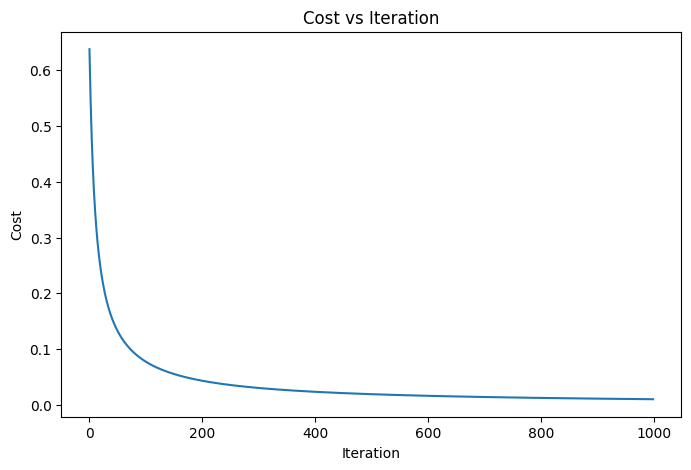

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()


In [ ]:
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    probs = logistic_function(z)
    return (probs >= threshold).astype(int)


In [ ]:
y_train_pred = prediction(X_train, w, b)
y_test_pred = prediction(X_test, w, b)

train_cost = costfunction_logreg(X_train, y_train, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)

train_acc = np.mean(y_train_pred == y_train) * 100
test_acc = np.mean(y_test_pred == y_test) * 100

print(f"Train Cost: {train_cost:.4f}")
print(f"Test Cost: {test_cost:.4f}")
print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


Train Cost: 0.0104
Test Cost: 0.0180
Train Accuracy: 100.00%
Test Accuracy: 100.00%


In [ ]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1 = (2 * precision * recall /
          (precision + recall)) if precision + recall > 0 else 0

    return confusion_matrix, precision, recall, f1


In [ ]:
cm, precision, recall, f1 = evaluate_classification(y_test, y_test_pred)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[20  0]
 [ 0 10]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [21]:
import numpy as np

def softmax(z):
    """
    Compute the softmax of a 2D numpy array.

    Parameters:
    z (numpy.ndarray): Shape (m, n) where m = number of samples
                        and n = number of classes.

    Returns:
    numpy.ndarray: Softmax probabilities of shape (m, n)
    """
    # Numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [22]:
def test_softmax():
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        # Check probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), \
            f"Failed: Sum not 1 in {description}"

        # Check non-negativity
        assert np.all(result >= 0), \
            f"Failed: Negative values in {description}"

        print("Passed.")

    print("All tests passed for softmax function.")

test_softmax()


Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


In [23]:
def loss_softmax(y_true, y_pred):
    """
    Compute categorical cross-entropy loss for a single sample.

    Parameters:
    y_true (numpy.ndarray): One-hot encoded true label (C,)
    y_pred (numpy.ndarray): Predicted probabilities (C,)

    Returns:
    float: Loss value
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [24]:
def test_loss_softmax():
    # Test Case 1: Correct prediction
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    expected_loss = -np.log(0.8)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), \
        "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    expected_loss = -np.log(0.3)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), \
        "Test Case 2 Failed"

    # Test Case 3: Near-zero probability
    y_true = np.array([0, 0, 1])
    y_pred = np.array([0.499999, 0.499999, 0.000002])
    expected_loss = -np.log(0.000002)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss, atol=1e-5), \
        "Test Case 3 Failed"

    print("All tests passed for loss_softmax function.")

test_loss_softmax()


All tests passed for loss_softmax function.
